Lab 2
Question 2 done by Matthew Rozak 1002055385
Questions 1 and 3 done by Collin Wilson

In [2]:
from scipy import *
import numpy as numpy
from scipy.special import *
from time import time
from matplotlib.pyplot import *
#2.a.i
N=10#number of boxes
NN=1#start for order of magnutude needed for approximate error
true=erf(3)
#define start and stop for integrals
start=0
stop=3
#define function to be integrated for erf
def f(x):
    return (2/sqrt(pi))*numpy.exp(-(x**2))
#define a function that integrates and function using trabezoidal rule
def trap(g,x1,x2,n):
    H=(x2-x1)/n#steps for integral
    v=0.5*(g(x1)+g(x2))#end of the trapezoidal rule steps aren counted as heavily so add seperate
    for i in range (1,n):#add all of the double counted internal trapezoids
        v+=(g(x1+i*H))
    return (v)*H
print("trapezoidal method of integration for N=10",trap(f,start,stop,N))
#define a function that integrates any function using simpsons rule
def simp(g,x1,x2,n):
    h=(x2-x1)/n#steps
    v=g(x1)+g(x2)#endpoint weighted differently add first
    for i in range(1,n):#i even
        if i%2==0:
            v+=2*g(x1+i*h)
        else:#i odd
            v+=4*g(x1+i*h)
    I=(1/3)*h*(v)#sum and multiply by 
    return I
print("simpsons method of integration for N=10",simp(f,start,stop,N))
print("expexted value for the integrals",erf(stop))

trapezoidal method of integration for N=10 0.9999719125941187
simpsons method of integration for N=10 0.9999770112979356
expexted value for the integrals 0.9999779095030014


The trapezoidal method of integration and Simpson's rule method of integration both give underestimates of the expected value which we are taking as scipy's erf functions value for 3.

In [1]:
#2.a.ii
#order of magnitued needed to reach desired error magnitude for trapezoidal rule
from time import time
NN=1#starting magnitude
IN=erf(stop)-trap(f,start,stop,10**NN)#start avlue to go into while loop
while abs(IN) > (10**(-10)):
    NN+=1#increase magnitude in while loop
    IN=true-(trap(f,start,stop,10**NN))#readjust value of integral and compare
    if abs(IN) <((10**(-10))):#stop while loop when desired error order met
        print("to reach error of magnitude 10**-11 with the trapezoidal rule you need 10**",NN,"divisions")
        break
nn=np.zeros(100)
for i in range (0,len(nn)):#time many times 
    NN=1#starting magnitude
    IN=erf(stop)-trap(f,start,stop,10**NN)#start avlue to go into while loop
    Start=time()#record start time
    while abs(IN) > (10**(-10)):
        NN+=1#increase magnitude in while loop
        IN=true-(trap(f,start,stop,10**NN))#readjust value of integral and compare
        if abs(IN) <((10**(-10))):#stop while loop when desired error order met
            #print("to reach error of magnitude 10**-11 with the trapezoidal rule you need 10**",NN,"divisions")
            break
    Stop=time()#record final time
    nn[i]=Stop-Start
print("time for trapezoidal method to reach error",numpy.mean(nn))#print time took to run the loop

NN=1#reset counter for while loop
IN=erf(stop)-simp(f,start,stop,10**NN)#get start value for while loop
while abs(IN) > (10**(-10)):#while loop using same method as above
    NN+=1
    IN=erf(stop)-simp(f,start,stop,10**NN)
    if abs(IN) <((10**(-10))):
        print("to reach error of magnitude 10**-11 with simpson's rule you need 10**",NN,"divisions")
        break
nn=numpy.zeros(100)
for i in range (0,len(nn)):#time many times and find average
    NN=1#reset counter for while loop
    IN=erf(stop)-simp(f,start,stop,10**NN)#get start value for while loop
    Start2=time()#record start time
    while abs(IN) > (10**(-10)):#while loop using same method as above
        NN+=1
        IN=erf(stop)-simp(f,start,stop,10**NN)
        if abs(IN) <((10**(-10))):
            break
    Stop2=time()#stop time
    nn[i]=Stop2-Start2
print("time for simpson's method to reach error",numpy.mean(nn))#print time for calculation to reach desired time

NameError: name 'erf' is not defined

For the trapezoidal rule you need of order $10^4$ divisions to computer the integral with percision of order $10^{-11}$. The function to figure this out took on average 0.123 seconds to run. For Simpson's rule you need of order $10^3$ divisions to computer the integral with percision of order $10^{-11}$. The function to figure this out took on average 0.0136 seconds to run.

In [3]:
#2.a.iii
def eulererrorest(g,S1,S2,n):#method to estimate error from 5.2.1 using eqn 5.28
    I1=trap(g,S1,S2,int(n/2)-1)#divide by 2 and subtract 1 to get it at half as many boxes
    I2=trap(g,S1,S2,n)#second integral with desired number of boxes to find error
    err=(1/3)*(I2-I1)
    return err
def simpsonerrorest(g,S1,S2,n):#method to estimate error from 5.2.1 using eqn 5.29
    I1=simp(g,S1,S2,int(n/2)-1)#setup similar to above
    I2=simp(g,S1,S2,n)#setup similar to above
    err=(1/15)*(I2-I1)
    return err
#print values for estimated errors
print("error estimate for N=10")
print('trapezoidal rule value')
print(trap(f,start,stop,20))
print('error estimate')
print(eulererrorest(f,start,stop,20))
print('simpson rule value')
print(simp(f,start,stop,20))
print('error estimate')
print(simpsonerrorest(f,start,stop,20))

error estimate for N=10
trapezoidal rule value
0.9999763603313787
error estimate
1.9269057539942716e-06
simpson rule value
0.9999778429104651
error estimate
1.917796065642463e-06


In [4]:
#2.a.iv
#define derivatives needed for euler error estimate
#C=10**-16
#error constant for python given from text book
def fprime(x):
    return -2*x*(2/sqrt(pi))*numpy.exp(-(x**2))
def ftripprime(x):
    return -4*x*(2*(x**2)-3)*(2/sqrt(pi))*numpy.exp(-(x**2))
#define a function for trapezoidal euler error
def traperr(g,x1,x2,n):
    h=(x2-x1)/n# calculate h as defined in the textbook for use 
    err=(1/12)*(h**2)*(g(x1)-g(x2))#euler error from eqn 5.20
    return err
#define a function for simpson euler error estimate
def simperr(g,x1,x2,n):
    h=(x2-x1)/n#define h for use later
    return (1/180)*(h**4)*(g(x1)-g(x2))#return euler error for simpson rule eqn 5.24 from book
N=20# number of slices to estimate and compare error
#print values error estimates and euler errors for comparison
print('error estimates')
print('trapezoidal rule value')
print(trap(f,start,stop,N))
print('error estimate')
print(eulererrorest(f,start,stop,N))
print('euler error')
print(traperr(fprime,start,stop,N))#remember derivative gets plugged in here
print('')
print('simpson rule value')
#multiply n by 2 for simpson rule to get same number of curves yoused to compare with trapazoild rule
print(simp(f,start,stop,2*N))
print('error estimate')
print(simpsonerrorest(f,start,stop,2*N))
print('euler error')
print(simperr(ftripprime,start,stop,2*N))# remmeber to plug in tripple derivative

error estimates
trapezoidal rule value
0.9999763603313787
error estimate
1.9269057539942716e-06
euler error
1.5665968344009135e-06

simpson rule value
0.999977905159118
error estimate
7.114971299978142e-07
euler error
4.406053596752569e-09


In order to compare the error estimates for a simpsons rule integral with a trapezoidal rule integral, we would need the simpsons rule integral to have twice as many divisions as the trapezodal rule that way you use the same number of curves as simpson's rule. To do this you would multiply n by 2 for the simpsons rule calculation. The error on the result of the integral is a few order of magnitudes less than the trapazoidal rule, and is a much better approximation.

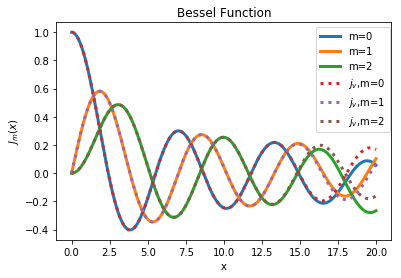

In [5]:
#2.b.i
#define bessel function using simpsons rule
def bess(m,x):
    def g(y):#subfunction used for inside of belles integral
        return cos(m*y-x*sin(y))
    a=(1/pi)*simp(g,0,numpy.pi,20)#use simpson's method to 
    return a
Y=numpy.linspace(start=0,stop=20,num=1000)
#calculate values for the bessel function using our bessel function and scipy's jv function
J0=bess(0,Y)
J1=bess(1,Y)
J2=bess(2,Y)
J00=jv(0,Y)
J11=jv(1,Y)
J22=jv(2,Y)
#plots
plot(Y,J0,label='m=0',linewidth=3)
plot(Y,J1,label='m=1',linewidth=3)
plot(Y,J2,label='m=2',linewidth=3)
plot(Y,J00,label='$j_v$,m=0',linestyle=':',linewidth=3)
plot(Y,J11,label='$j_v$,m=1',linestyle=':',linewidth=3)
plot(Y,J22,label='$j_v$,m=2',linestyle=':',linewidth=3)
xlabel('x')
ylabel('$J_m(x)$')
title('Bessel Function')
leg = legend(bbox_to_anchor = (1.01, 1.0))

Our bessel functions reproduce the scipy.jv bessel function quite well when x is small, however as x gets larger the error increases and our bessel function stops being a good representation of the accepted bessel function.

Text(0.5,1,'density of diffraction pattern of a telescope')

<Figure size 432x288 with 0 Axes>

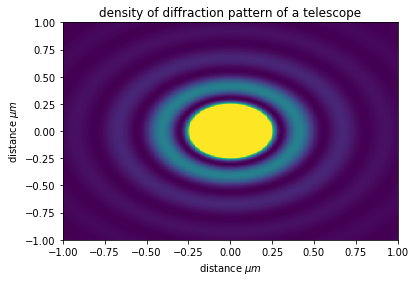

In [6]:
#2.b.ii
lam=0.5#define wavelength in therms of micometers
k=2*numpy.pi/lam#calculate k
#use our bessel function to make a function that calculated intensity
def II(R):
    K=float(k*R)
    JJ=(bess(1,K))
    c=(JJ/K)**2
    return c
n=401#total length of array, make odd so that there will be a centre where it intersects to make origin
u=numpy.linspace(-1,1,n)#make array for indicies on graph
X=numpy.empty([n,n])#make an empty array
#make the values of the empty array their distance from the centre of the array
for i in range (0,len(X[0])):
    for l in range (0,len(X[0])):
        X[i][l]=numpy.sqrt((len(X[0])/2-i)**2+((len(X[0])/2-l)**2))
#scale the array so that the smallest value on the outside is a distance 1 from the centre of the array
MIN=min(X[0])
scale=1/MIN
X=X*scale
#set the values of the array to their intensity 
for i in range (0,len(X[0])):
    for l in range (0,len(X[0])):
        X[i][l]=II(X[i][l])
#plot the intensity graph
figure()
fig, ax = subplots(1)
pcolormesh(u,u,X, vmax = 0.01)
xlabel('distance $\mu m$')
ylabel('distance $\mu m$')
title('density of diffraction pattern of a telescope')